# New Exploratory Data Analysis Tools

## Pandas Visualization Tools -Styler

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl

df = pd.DataFrame([[38.0, 2.0, 18.0, 22.0, 21, np.nan],[19, 439, 6, 452, 226,232]],
                  index=pd.Index(['Tumour (Positive)', 'Non-Tumour (Negative)'], name='Actual Label:'),
                  columns=pd.MultiIndex.from_product([['Decision Tree', 'Regression', 'Random'],['Tumour', 'Non-Tumour']], names=['Model:', 'Predicted:']))

In [2]:
df

Model:                Decision Tree            Regression            Random  \
Predicted:                   Tumour Non-Tumour     Tumour Non-Tumour Tumour   
Actual Label:                                                                 
Tumour (Positive)              38.0        2.0       18.0       22.0     21   
Non-Tumour (Negative)          19.0      439.0        6.0      452.0    226   

Model:                            
Predicted:            Non-Tumour  
Actual Label:                     
Tumour (Positive)            NaN  
Non-Tumour (Negative)      232.0

### Formating the Values

In [3]:
# Styler can distinguish between display values and actual values.

df.style.format(precision=0, na_rep='MISSING', thousands=" ",
                formatter={('Decision Tree', 'Tumour'): "{:.2f}",
                           ('Regression', 'Non-Tumour'): lambda x: "$ {:,.1f}".format(x*-1e6)
                          })

In [4]:
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2021-01-01", periods=10),
                          columns=["Tokyo", "Beijing"])

In [5]:
weather_df

,Tokyo,Beijing
2021-01-01,2.655589,4.665701
2021-01-02,3.287313,2.573385
2021-01-03,0.224204,3.186604
2021-01-04,3.855875,1.341078
2021-01-05,2.397821,1.751938
2021-01-06,1.710971,4.972193
2021-01-07,0.839882,4.455795
2021-01-08,0.719253,4.838514
2021-01-09,4.593523,0.955578
2021-01-10,3.027608,4.700492


In [6]:
def rain_condition(v):
    if v < 1.75:
        return "Dry"
    elif v < 2.75:
        return "Rain"
    return "Heavy Rain"

def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

In [7]:
weather_df.loc["2021-01-04":"2021-01-08"].style.pipe(make_pretty)

,Tokyo,Beijing
Monday,Heavy Rain,Dry
Tuesday,Rain,Rain
Wednesday,Dry,Heavy Rain
Thursday,Dry,Heavy Rain
Friday,Dry,Heavy Rain


### Hiding data

In [8]:
s = df.style.format('{:.0f}').hide([('Random', 'Tumour'), ('Random', 'Non-Tumour')], axis="columns")
s

### Table Styles

In [9]:
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
s.set_table_styles([cell_hover, index_names, headers])

In [10]:
s.set_table_styles([
    {'selector': 'th.col_heading', 'props': 'text-align: center;'},
    {'selector': 'th.col_heading.level0', 'props': 'font-size: 1.5em;'},
    {'selector': 'td', 'props': 'text-align: center; font-weight: bold;'},
], overwrite=False)

In [11]:
s.set_table_styles({
    ('Regression', 'Tumour'): [{'selector': 'th', 'props': 'border-left: 1px solid white'},
                               {'selector': 'td', 'props': 'border-left: 1px solid #000066'}]
}, overwrite=False, axis=0)

### Setting Classes and Linking to External CSS

In [12]:
s.set_table_styles([  # create internal CSS classes
    {'selector': '.true', 'props': 'background-color: #e6ffe6;'},
    {'selector': '.false', 'props': 'background-color: #ffe6e6;'},
], overwrite=False)
cell_color = pd.DataFrame([['true ', 'false ', 'true ', 'false '],
                           ['false ', 'true ', 'false ', 'true ']],
                          index=df.index,
                          columns=df.columns[:4])
s.set_td_classes(cell_color)

In [19]:
np.random.seed(0)
df2 = pd.DataFrame(np.random.randn(10,4), columns=['A','B','C','D'])
df2.style

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [20]:
def style_negative(v, props=''):
    return props if v < 0 else None
s2 = df2.style.applymap(style_negative, props='color:red;')\
              .applymap(lambda v: 'opacity: 20%;' if (v < 0.3) and (v > -0.3) else None)
s2

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [21]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
s2.apply(highlight_max, props='color:white;background-color:darkblue', axis=0)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [22]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
s2.apply(highlight_min, props='color:white;background-color:#f18973', axis=0)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [23]:
s2.applymap_index(lambda v: "color:pink;" if v>4 else "color:darkblue;", axis=0)
s2.apply_index(lambda s: np.where(s.isin(["A", "B"]), "color:pink;", "color:darkblue;"), axis=1)

,A,B,C,D
0,1.764052,0.400157,0.978738,2.240893
1,1.867558,-0.977278,0.950088,-0.151357
2,-0.103219,0.410599,0.144044,1.454274
3,0.761038,0.121675,0.443863,0.333674
4,1.494079,-0.205158,0.313068,-0.854096
5,-2.552990,0.653619,0.864436,-0.742165
6,2.269755,-1.454366,0.045759,-0.187184
7,1.532779,1.469359,0.154947,0.378163
8,-0.887786,-1.980796,-0.347912,0.156349
9,1.230291,1.202380,-0.387327,-0.302303


In [1]:
ls

bayesian.ipynb                                Pipeline.png
bg_nbd_model_description.png                  random_coefficients.png
bg_nbd_model_description.png:Zone.Identifier  schema.yml
datasets/                                     styled.xlsx
eda.ipynb                                     testing_ml.ipynb
full_bayesian_bg-nbd.png                      testPower.r
LinearModels.ipynb                            variance_components.png


In [24]:
s.set_caption("Confusion matrix for multiple cancer prediction models.")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: bottom; font-size:1.25em;'
 }], overwrite=False)

In [25]:
s.set_table_styles([  # create internal CSS classes
    {'selector': '.border-red', 'props': 'border: 2px dashed red;'},
    {'selector': '.border-green', 'props': 'border: 2px dashed green;'},
], overwrite=False)
cell_border = pd.DataFrame([['border-green ', ' ', ' ', 'border-red '],
                           [' ', ' ', ' ', ' ']],
                          index=df.index,
                          columns=df.columns[:4])
s.set_td_classes(cell_color + cell_border)

### Finer Control with Slicing

In [26]:
df3 = pd.DataFrame(np.random.randn(4,4),
                   pd.MultiIndex.from_product([['A', 'B'], ['r1', 'r2']]),
                   columns=['c1','c2','c3','c4'])
df3

c1        c2        c3        c4
A r1 -1.048553 -1.420018 -1.706270  1.950775
  r2 -0.509652 -0.438074 -1.252795  0.777490
B r1 -1.613898 -0.212740 -0.895467  0.386902
  r2 -0.510805 -1.180632 -0.028182  0.428332

In [27]:
slice_ = ['c3', 'c4']
df3.style.apply(highlight_max, props='color:red;', axis=0, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

In [28]:
idx = pd.IndexSlice
slice_ = idx[idx[:,'r1'], idx['c2':'c4']]
df3.style.apply(highlight_max, props='color:red;', axis=0, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

In [29]:
slice_ = idx[idx[:,'r2'], :]
df3.style.apply(highlight_max, props='color:red;', axis=1, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

In [30]:
slice_ = idx[idx[(df3['c1'] + df3['c3']) < -2.0], ['c2', 'c4']]
df3.style.apply(highlight_max, props='color:red;', axis=1, subset=slice_)\
         .set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

### Export to Excel

In [32]:
df2.style.\
    applymap(style_negative, props='color:red;').\
    highlight_max(axis=0).\
    to_excel('styled.xlsx', engine='openpyxl')

## Phik (𝜙k)

Phik (𝜙k) is a new and practical correlation coefficient that works consistently between categorical, ordinal and interval variables, captures non-linear dependency and reverts to the Pearson correlation coefficient in case of a bivariate normal input distribution.

The most similar metric to 𝜙k is Cramer’s 𝜙, which is a correlation coefficient meant for two categorical variables and is also based on Pearson’s χ2 test statistic. What is important to note is that even though it is a measure used for categorical variables, it can also be used for ordinal and binned interval variables. However, the value of the coefficient is highly dependent on the binning chosen per variable and can therefore be difficult to interpret and compare. That is not the case for 𝜙k. Additionally, Cramer’s 𝜙 is sensitive to outliers, especially for smaller sample sizes.

Naturally, there are also some drawbacks of the new method:
- the calculation of 𝜙k is computationally expensive (due to calculation of some integrals under the hood),
- no closed-form formula,
- no indication of direction,
-when working with numeric-only variables, other correlation coefficients will be more precise, especially for small samples.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

import phik
from phik.report import plot_correlation_matrix
from phik import report

In [36]:
cols_to_keep = ["english_name", "gen", "primary_type", "secondary_type",
                "hp", "attack", "defense", "sp_attack", 
                "sp_defense", "speed", "is_legendary", "is_sublegendary", "is_mythical"]
                
df = pd.read_csv("./datasets/pokemon.csv", encoding="utf-16-le", sep="\t")
df = df[cols_to_keep]
df = df.set_index("english_name")
df.head()

,gen,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,is_sublegendary,is_mythical
english_name,,,,,,,,,,,,
Bulbasaur,I,grass,poison,45,49,49,65,65,45,0,0,0
Ivysaur,I,grass,poison,60,62,63,80,80,60,0,0,0
Venusaur,I,grass,poison,80,82,83,100,100,80,0,0,0
Charmander,I,fire,NaN,39,52,43,60,50,65,0,0,0
Charmeleon,I,fire,NaN,58,64,58,80,65,80,0,0,0


In [40]:
interval_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
phik_overview = df.phik_matrix(interval_cols=interval_cols)

In [41]:
phik_overview

,gen,primary_type,secondary_type,hp,attack,defense,sp_attack,sp_defense,speed,is_legendary,is_sublegendary,is_mythical
gen,1.000000,0.272726,0.505442,0.033814,0.154335,0.094097,0.000000,0.129318,0.101911,0.077898,0.280369,0.091459
primary_type,0.272726,1.000000,0.615622,0.113320,0.304013,0.292604,0.347285,0.251910,0.262711,0.297484,0.108569,0.117164
secondary_type,0.505442,0.615622,1.000000,0.111118,0.250191,0.387183,0.281368,0.197364,0.287700,0.000000,0.165306,0.107653
hp,0.033814,0.113320,0.111118,1.000000,0.656955,0.659373,0.496676,0.439994,0.186801,0.376235,0.337391,0.184933
attack,0.154335,0.304013,0.250191,0.656955,1.000000,0.603576,0.530309,0.280304,0.277258,0.387124,0.237333,0.216558
defense,0.094097,0.292604,0.387183,0.659373,0.603576,1.000000,0.334843,0.655287,0.197077,0.267343,0.232854,0.158654
sp_attack,0.000000,0.347285,0.281368,0.496676,0.530309,0.334843,1.000000,0.469149,0.353237,0.495679,0.363241,0.291572
sp_defense,0.129318,0.251910,0.197364,0.439994,0.280304,0.655287,0.469149,1.000000,0.280307,0.234875,0.244718,0.163222
speed,0.101911,0.262711,0.287700,0.186801,0.277258,0.197077,0.353237,0.280307,1.000000,0.207774,0.254706,0.191633
is_legendary,0.077898,0.297484,0.000000,0.376235,0.387124,0.267343,0.495679,0.234875,0.207774,1.000000,0.000000,0.000000


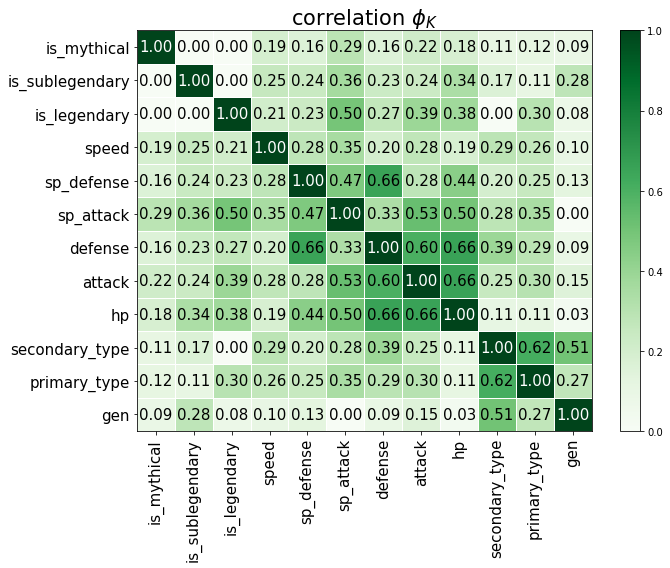

In [42]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(10, 8))
plt.tight_layout()

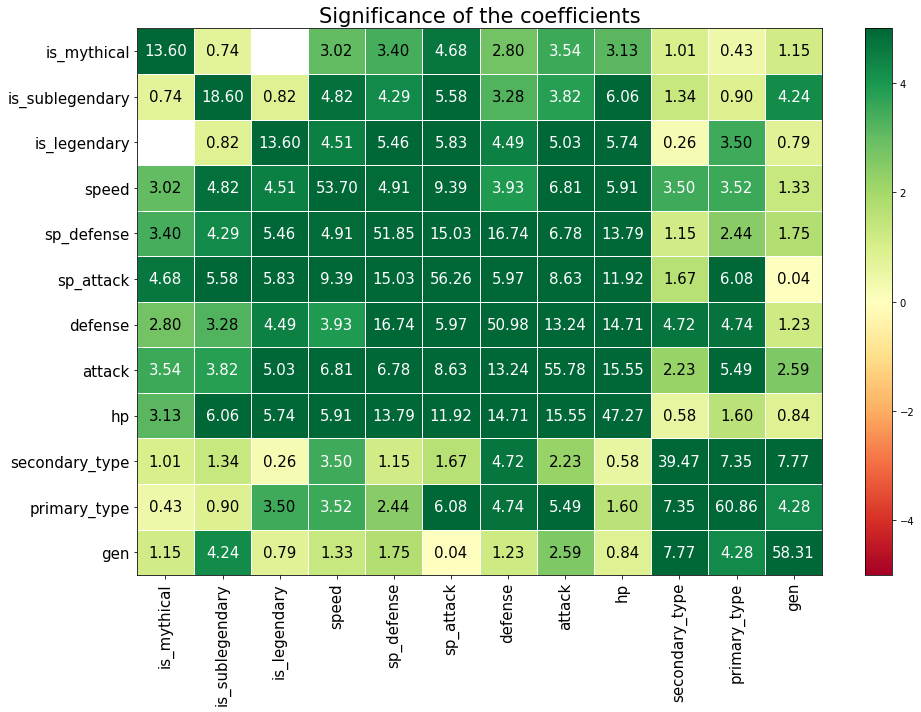

In [43]:
'''
When assessing correlations we should not only look at the coefficients but also at their statistical 
significance. Because in the end, a large correlation may be statistically insignificant, and vice versa.
'''

significance_overview = df.significance_matrix(interval_cols=interval_cols)
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1.5, figsize=(14, 10))
plt.tight_layout()

### Global correlation

The global correlation coefficient is a useful measure expressing the total correlation of one variable to all other variables in the dataset. This gives us an indication of how well one variable can be modeled using the other variables.

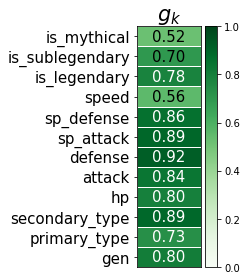

In [44]:
global_correlation, global_labels = df.global_phik(interval_cols=interval_cols)

plot_correlation_matrix(global_correlation, 
                        x_labels=[''], y_labels=global_labels, 
                        vmin=0, vmax=1, figsize=(3.5,4),
                        color_map="Greens", title=r"$g_k$",
                        fontsize_factor=1.5)
plt.tight_layout()

### Outlier Significance

While Pearson’s correlation between two continuous variables is easy to interpret, that is not the case for 𝜙k between two variables of mixed types, especially when it concerns categorical variables. That is why the authors provided additional functionality to look at the outliers — excesses, and deficits over the expected frequencies coming from the contingency table of two variables.

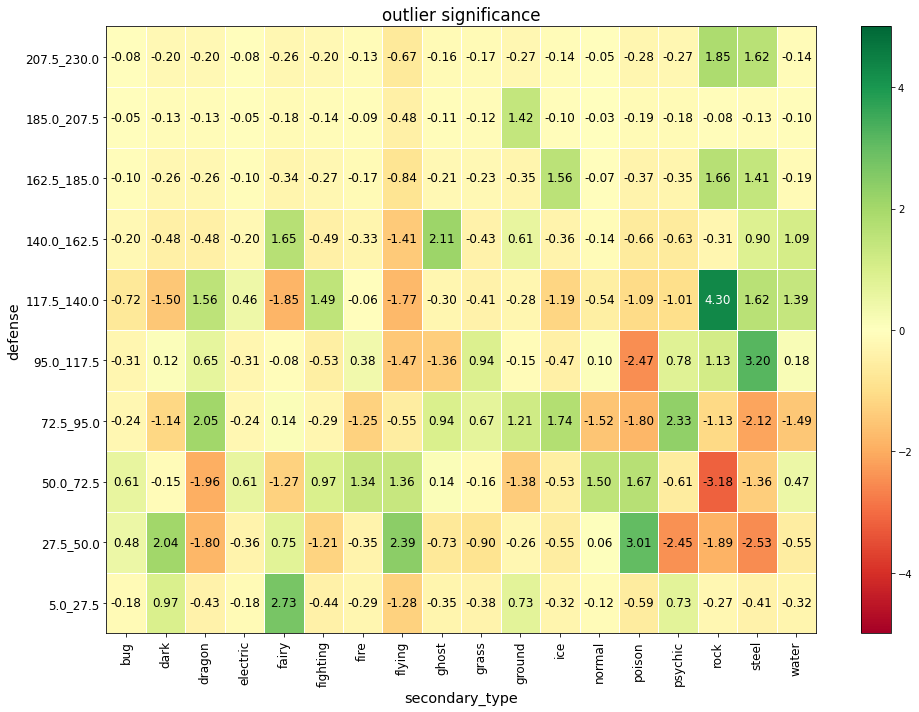

In [45]:
'''
We first take a look at a continuous vs. categorical feature. For that example, we selected 
secondary_type and defense.
'''

var_1 = "defense"
var_2 = "secondary_type"

tmp_interval_cols = ['defense']

outlier_signifs, binning_dict = df[[var_1, var_2]].outlier_significance_matrix(interval_cols=tmp_interval_cols, 
                                                                        retbins=True)

zvalues = outlier_signifs.values
xlabels = outlier_signifs.columns
ylabels = outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title='outlier significance',
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

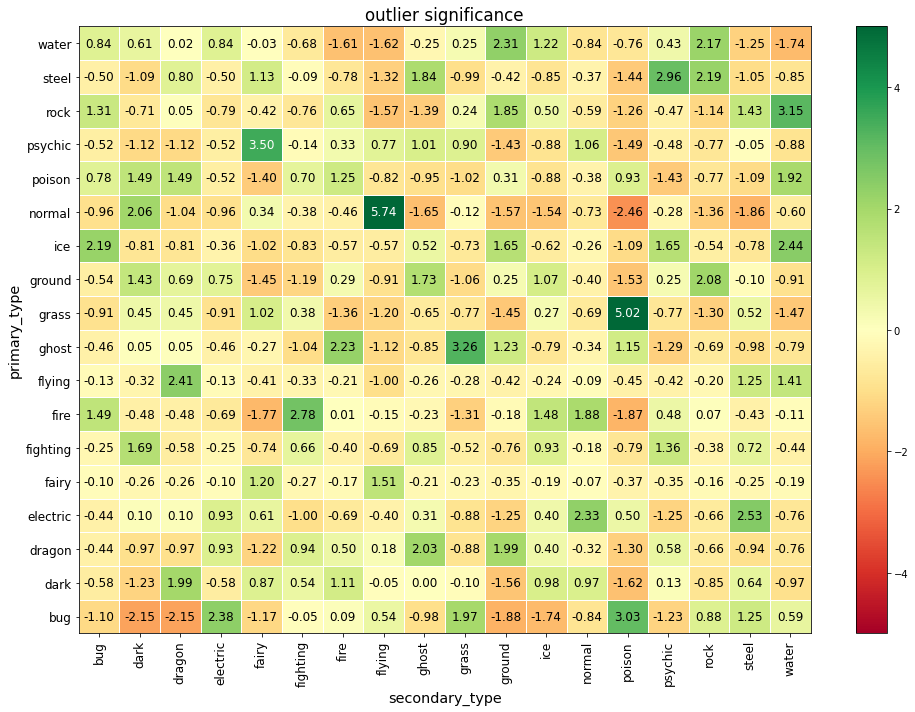

In [46]:
'''
Then, we do a similar analysis for two categorical variables — primary and secondary types.
'''

var_1 = "primary_type"
var_2 = "secondary_type"

outlier_signifs, binning_dict = df[[var_1,var_2]].outlier_significance_matrix(retbins=True)

zvalues = outlier_signifs.values
xlabels = binning_dict[var_2] if var_2 in binning_dict.keys() else outlier_signifs.columns
ylabels = binning_dict[var_1] if var_1 in binning_dict.keys() else outlier_signifs.index

plot_correlation_matrix(zvalues, x_labels=xlabels, y_labels=ylabels, 
                        x_label=var_2,y_label=var_1,
                        vmin=-5, vmax=5, title="outlier significance",
                        identity_layout=False, fontsize_factor=1.2, 
                        figsize=(14, 10))

### Correlation Report

interval columns not set, guessing: ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'is_legendary', 'is_sublegendary', 'is_mythical']


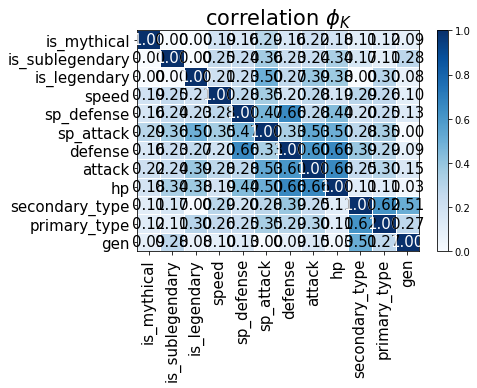

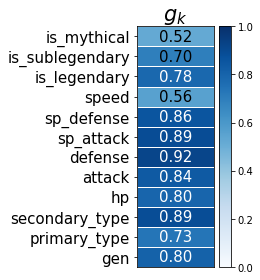

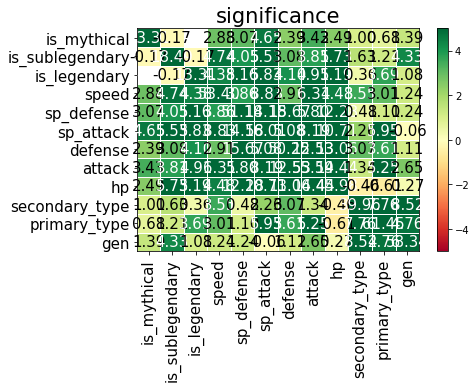

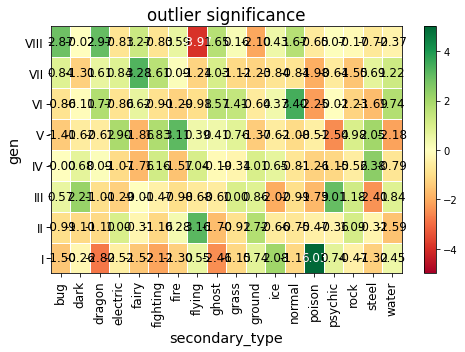

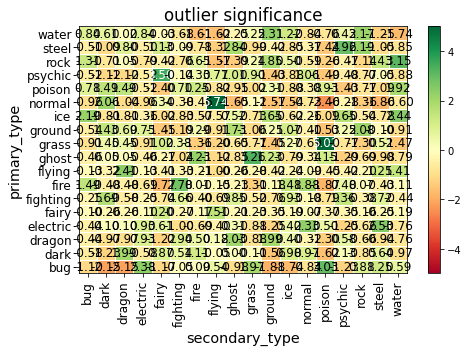

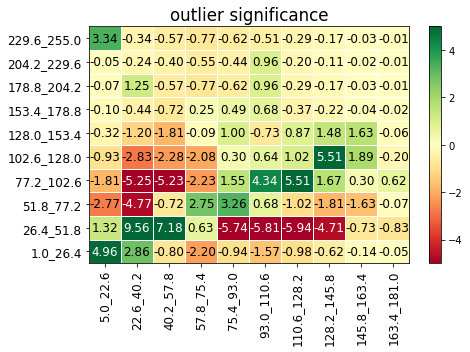

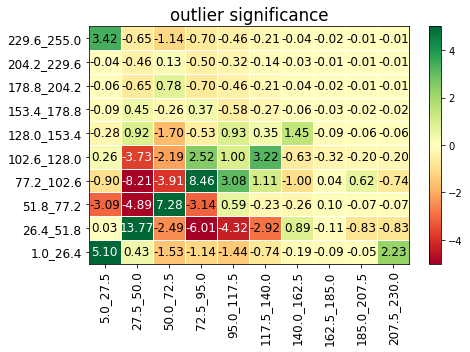

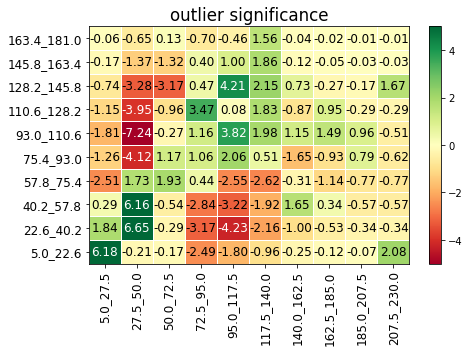

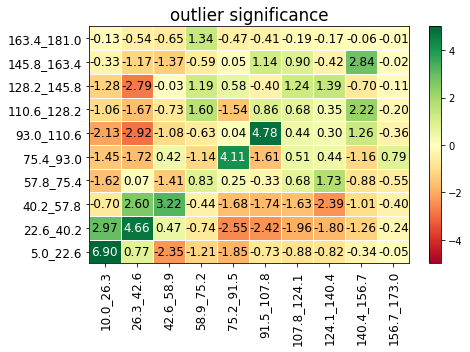

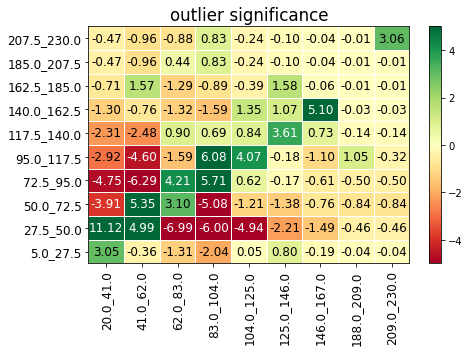

In [47]:
rep = report.correlation_report(df, significance_threshold=3, correlation_threshold=0.5)

## Satistical Test won't help you to compare Distributions

Forget p-values, and come to know “Standardized Wasserstein Distance”: a practically useful measure of the difference between distributions.

In [ ]:
import numpy as np
from scipy.stats import wasserstein_distance

def standardized_wasserstein_distance(a, b):
  """a and b are numpy arrays."""
  numerator = wasserstein_distance(a, b)
  denominator = np.std(np.concatenate([a, b]))
  return numerator / denominator if denominator != .0 else .0

https://github.com/smazzanti/standardized_wasserstein_distance/blob/main/swd.ipynb

Check examples with data

## Validate your Pandas DataFrames with Pandera

*Motivation*

In a data science project, it is not only important to test your functions, but it is also important to test your data to make sure they work as you expected.

In [48]:
import pandas as pd

fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": [2, 1, 3, 4],
    }
)

fruits

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,Aldi,4


In [49]:
'''
Imagine this scenario. Your manager told you that there can only be certain fruits 
and stores in the dataset, and the price must be less than 4.
'''

available_fruits = ["apple", "banana", "orange"]
nearby_stores = ["Aldi", "Walmart"]

In [50]:
import pandera as pa
from pandera import Column, Check

#https://pandera.readthedocs.io/en/stable/reference/generated/pandera.checks.Check.html#pandera-checks-check

schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store": Column(str, Check.isin(nearby_stores)),
        "price": Column(int, Check.less_than(4)),
    }
)
schema.validate(fruits)

/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


SchemaError: <Schema Column(name=price, type=DataType(int64))> failed element-wise validator 0:
<Check less_than: less_than(4)>
failure cases:
   index  failure_case
0      3             4

### Custom Checks

We can also create custom checks using lambda . In the code below, Check(lambda price: sum(price) < 20) checks if the sum of the column price is less than 20.

In [51]:
schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store": Column(str, Check.isin(nearby_stores)),
        "price": Column(
            int, [Check.less_than(5), Check(lambda price: sum(price) < 20)]
        ),
    }
)
schema.validate(fruits)

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,Aldi,4


### Schema Model

When our tests are complicated, using dataclass can make our tests look much cleaner than using a dictionary. Luckily, Pandera also allows us to create tests using a dataclass instead of a dictionary.

In [52]:
from pandera.typing import Series

class Schema(pa.SchemaModel):
    name: Series[str] = pa.Field(isin=available_fruits)
    store: Series[str] = pa.Field(isin=nearby_stores)
    price: Series[int] = pa.Field(le=5)

    @pa.check("price")
    def price_sum_lt_20(cls, price: Series[int]) -> Series[bool]:
        return sum(price) < 20

Schema.validate(fruits)

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,Aldi,4


### Validation Decorator

Now that we know how to create tests for our data, how do we use it to test the input of our function? A straightforward approach is to add schema.validate(input) inside a function.

In [53]:
fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": [2, 1, 3, 4],
    }
)

schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store": Column(str, Check.isin(nearby_stores)),
        "price": Column(int, Check.less_than(5)),
    }
)


def get_total_price(fruits: pd.DataFrame, schema: pa.DataFrameSchema):
    validated = schema.validate(fruits)
    return validated["price"].sum()


get_total_price(fruits, schema)

10

In [54]:
def test_get_total_price():
    fruits = pd.DataFrame({'name': ['apple', 'banana'], 'store': ['Aldi', 'Walmart'], 'price': [1, 2]})
    
    # Need to include schema in the unit test
    schema = pa.DataFrameSchema(
        {
            "name": Column(str, Check.isin(available_fruits)),
            "store": Column(str, Check.isin(nearby_stores)),
            "price": Column(int, Check.less_than(5)),
        }
    )
    assert get_total_price(fruits, schema) == 3

In [55]:
from pandera import check_input

@check_input(schema)
def get_total_price(fruits: pd.DataFrame):
    return fruits.price.sum()

get_total_price(fruits)

10

In [56]:

fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": ["2", "1", "3", "4"],
    }
)

@check_input(schema)
def get_total_price(fruits: pd.DataFrame):
    return fruits.price.sum()

get_total_price(fruits)

SchemaError: error in check_input decorator of function 'get_total_price': expected series 'price' to have type int64, got object

### Check Output

In [57]:
from pandera import check_output

fruits_nearby = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": [2, 1, 3, 4],
    }
)

fruits_faraway = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Whole Foods", "Whole Foods", "Schnucks", "Schnucks"],
        "price": [3, 2, 4, 5],
    }
)

out_schema = pa.DataFrameSchema(
    {"store": Column(str, Check.isin(["Aldi", "Walmart", "Whole Foods", "Schnucks"]))}
)


@check_output(out_schema)
def combine_fruits(fruits_nearby: pd.DataFrame, fruits_faraway: pd.DataFrame):
    fruits = pd.concat([fruits_nearby, fruits_faraway])
    return fruits


combine_fruits(fruits_nearby, fruits_faraway)

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,Aldi,4
0,apple,Whole Foods,3
1,banana,Whole Foods,2
2,apple,Schnucks,4
3,orange,Schnucks,5


### Check both Input/Output

In [58]:
from pandera import check_output

fruits_nearby = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": [2, 1, 3, 4],
    }
)

fruits_faraway = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Whole Foods", "Whole Foods", "Schnucks", "Schnucks"],
        "price": [3, 2, 4, 5],
    }
)

out_schema = pa.DataFrameSchema(
    {"store": Column(str, Check.isin(["Aldi", "Walmart", "Whole Foods", "Schnucks"]))}
)


@check_output(out_schema)
def combine_fruits(fruits_nearby: pd.DataFrame, fruits_faraway: pd.DataFrame):
    fruits = pd.concat([fruits_nearby, fruits_faraway])
    return fruits


combine_fruits(fruits_nearby, fruits_faraway)

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,Aldi,4
0,apple,Whole Foods,3
1,banana,Whole Foods,2
2,apple,Schnucks,4
3,orange,Schnucks,5


### Other Arguments for Column Validation

#### Deal with null values

In [59]:
import numpy as np

fruits = fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", np.nan],
        "price": [2, 1, 3, 4],
    }
)

schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store": Column(str, Check.isin(nearby_stores), nullable=True),
        "price": Column(int, Check.less_than(5)),
    }
)
schema.validate(fruits)

,name,store,price
0,apple,Aldi,2
1,banana,Walmart,1
2,apple,Walmart,3
3,orange,NaN,4


#### Deal with Duplicates

In [60]:
schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store": Column(
            str, Check.isin(nearby_stores), nullable=True, allow_duplicates=False
        ),
        "price": Column(int, Check.less_than(5)),
    }
)
schema.validate(fruits)

TypeError: __init__() got an unexpected keyword argument 'allow_duplicates'

#### Convert datatypes

In [61]:
fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "price": [2, 1, 3, 4],
    }
)

schema = pa.DataFrameSchema({"price": Column(str, coerce=True)})
validated = schema.validate(fruits)
validated.dtypes

name     object
store    object
price    object
dtype: object

#### Match Patterns

In [62]:
favorite_stores = ["Aldi", "Walmart", "Whole Foods", "Schnucks"]

fruits = pd.DataFrame(
    {
        "name": ["apple", "banana", "apple", "orange"],
        "store_nearby": ["Aldi", "Walmart", "Walmart", "Aldi"],
        "store_far": ["Whole Foods", "Schnucks", "Whole Foods", "Schnucks"],
    }
)

schema = pa.DataFrameSchema(
    {
        "name": Column(str, Check.isin(available_fruits)),
        "store_+": Column(str, Check.isin(favorite_stores), regex=True),
    }
)
schema.validate(fruits)

,name,store_nearby,store_far
0,apple,Aldi,Whole Foods
1,banana,Walmart,Schnucks
2,apple,Walmart,Whole Foods
3,orange,Aldi,Schnucks


### Export and Load From a YAML File

#### Export to YAML

In [64]:
from pathlib import Path

# Get a YAML object
yaml_schema = schema.to_yaml()

# Save to a file
f = Path("schema.yml")
f.touch()
f.write_text(yaml_schema)

504

#### Load from YAML

In [68]:
with f.open() as file:
    yaml_schema = file.read()

schema = pa.io.from_yaml(yaml_schema)

## Introduction to Statistical Power and Power Analysis

The statistical power of a hypothesis test is the probability of detecting an effect, if there is a true effect present to detect. That is, the probability of a true positive result. It is only useful when the null hypothesis is rejected.


After completing this tutorial, you will know:

- Statistical power is the probability of a hypothesis test of finding an effect if there is an effect to be found.
- A power analysis can be used to estimate the minimum sample size required for an experiment, given a desired significance level, effect size, and statistical power.
- How to calculate and plot power analysis for the Student’s t test in Python in order to effectively design an experiment.


Statistical power is one piece in a puzzle that has four related parts; they are:

- Effect Size. The quantified magnitude of a result present in the population. Effect size is calculated using a specific statistical measure, such as Pearson’s correlation coefficient for the relationship between variables or Cohen’s d for the difference between groups.
- Sample Size. The number of observations in the sample.
- Significance. The significance level used in the statistical test, e.g. alpha. Often set to 5% or 0.05.
- Statistical Power. The probability of accepting the alternative hypothesis if it is true.

### Students T Test Power Analysis

In [1]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect = 0.8
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


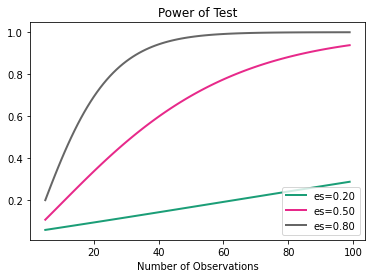

In [2]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(5, 100))

# calculate power curves from multiple power analyses
analysis = TTestIndPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.show()

## Signal Processing with Python

### Fourier Transform

Why is this useful? Well, multiple reasons, but let’s pick two:

- You may filter your signal. You know that, generally, your signal will have a limited frequency band. If you see something outside of that band you can assume it is white noise (noise that lives at all frequencies) and you can filter it out. (Noise Filtering)
- You may analyze the periodical pattern of your signal and find very useful insight about the seasonal part of your system. (Frequency Analysis)

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from scipy import signal
import pywt

Text(0, 0.5, 'MW Energy Consumption')

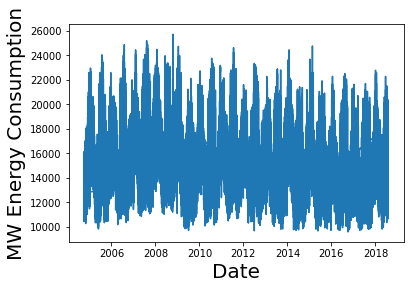

In [6]:
data_fft = pd.read_csv('./datasets/AEP_hourly.csv')
y = np.array(data_fft.AEP_MW)
x = data_fft.index
date_array = pd.to_datetime(data_fft.Datetime)
plt.plot(date_array,y)
plt.xlabel('Date',fontsize=20)
plt.ylabel('MW Energy Consumption',fontsize=20)

In [7]:
data_fft.head(4)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0


In [8]:
date_array

0        2004-12-31 01:00:00
1        2004-12-31 02:00:00
2        2004-12-31 03:00:00
3        2004-12-31 04:00:00
4        2004-12-31 05:00:00
                 ...        
121268   2018-01-01 20:00:00
121269   2018-01-01 21:00:00
121270   2018-01-01 22:00:00
121271   2018-01-01 23:00:00
121272   2018-01-02 00:00:00
Name: Datetime, Length: 121273, dtype: datetime64[ns]

Text(0, 0.5, 'Temperature')

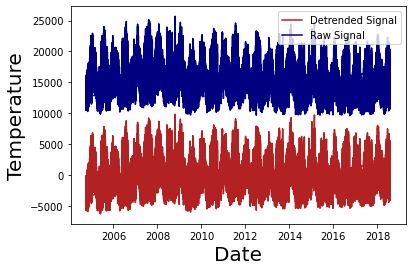

In [9]:
y_detrend = signal.detrend(y)
plt.plot(date_array, y_detrend,color='firebrick',label='Detrended Signal')
plt.plot(date_array,y, color='navy',label='Raw Signal')
plt.legend()
plt.xlabel('Date',fontsize=20)
plt.ylabel('Temperature',fontsize=20)

(0.0, 200.0)

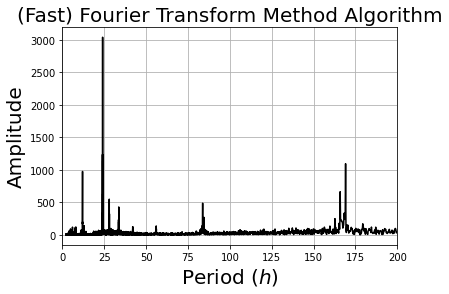

In [10]:
# Frequency Analysis

FFT =np.fft.fft(y_detrend)
new_N=int(len(FFT)/2) 
f_nat=1
new_X = np.linspace(10**-12, f_nat/2, new_N, endpoint=True)
new_Xph=1.0/(new_X)
FFT_abs=np.abs(FFT)
plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='black')
plt.xlabel('Period ($h$)',fontsize=20)
plt.ylabel('Amplitude',fontsize=20)
plt.title('(Fast) Fourier Transform Method Algorithm',fontsize=20)
plt.grid(True)
plt.xlim(0,200)

In [11]:
fft_abs = 2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph)
fft_abs = pd.DataFrame(fft_abs, columns = ['Amplitude'])
fft_sorted = fft_abs.sort_values(by='Amplitude',ascending=False).head(20)
fft_sorted

,Amplitude
5054,3037.558970
28,2556.509851
27,1636.961921
5068,1235.815611
5040,1137.886002
5055,1105.313718
717,1094.463940
10108,975.280091
10109,932.572475
14,895.208752


In [12]:
fft_sorted.index/24

Float64Index([ 210.58333333333334,  1.1666666666666667,               1.125,
               211.16666666666666,               210.0,             210.625,
                           29.875,   421.1666666666667,   421.2083333333333,
               0.5833333333333334,  1.0833333333333333,  210.54166666666666,
               1.0416666666666667,  30.458333333333332,  210.04166666666666,
               180.70833333333334,             421.125,  209.95833333333334,
               60.333333333333336, 0.16666666666666666],
             dtype='float64')

In [18]:
plt.rcParams["figure.figsize"] = (30,20)

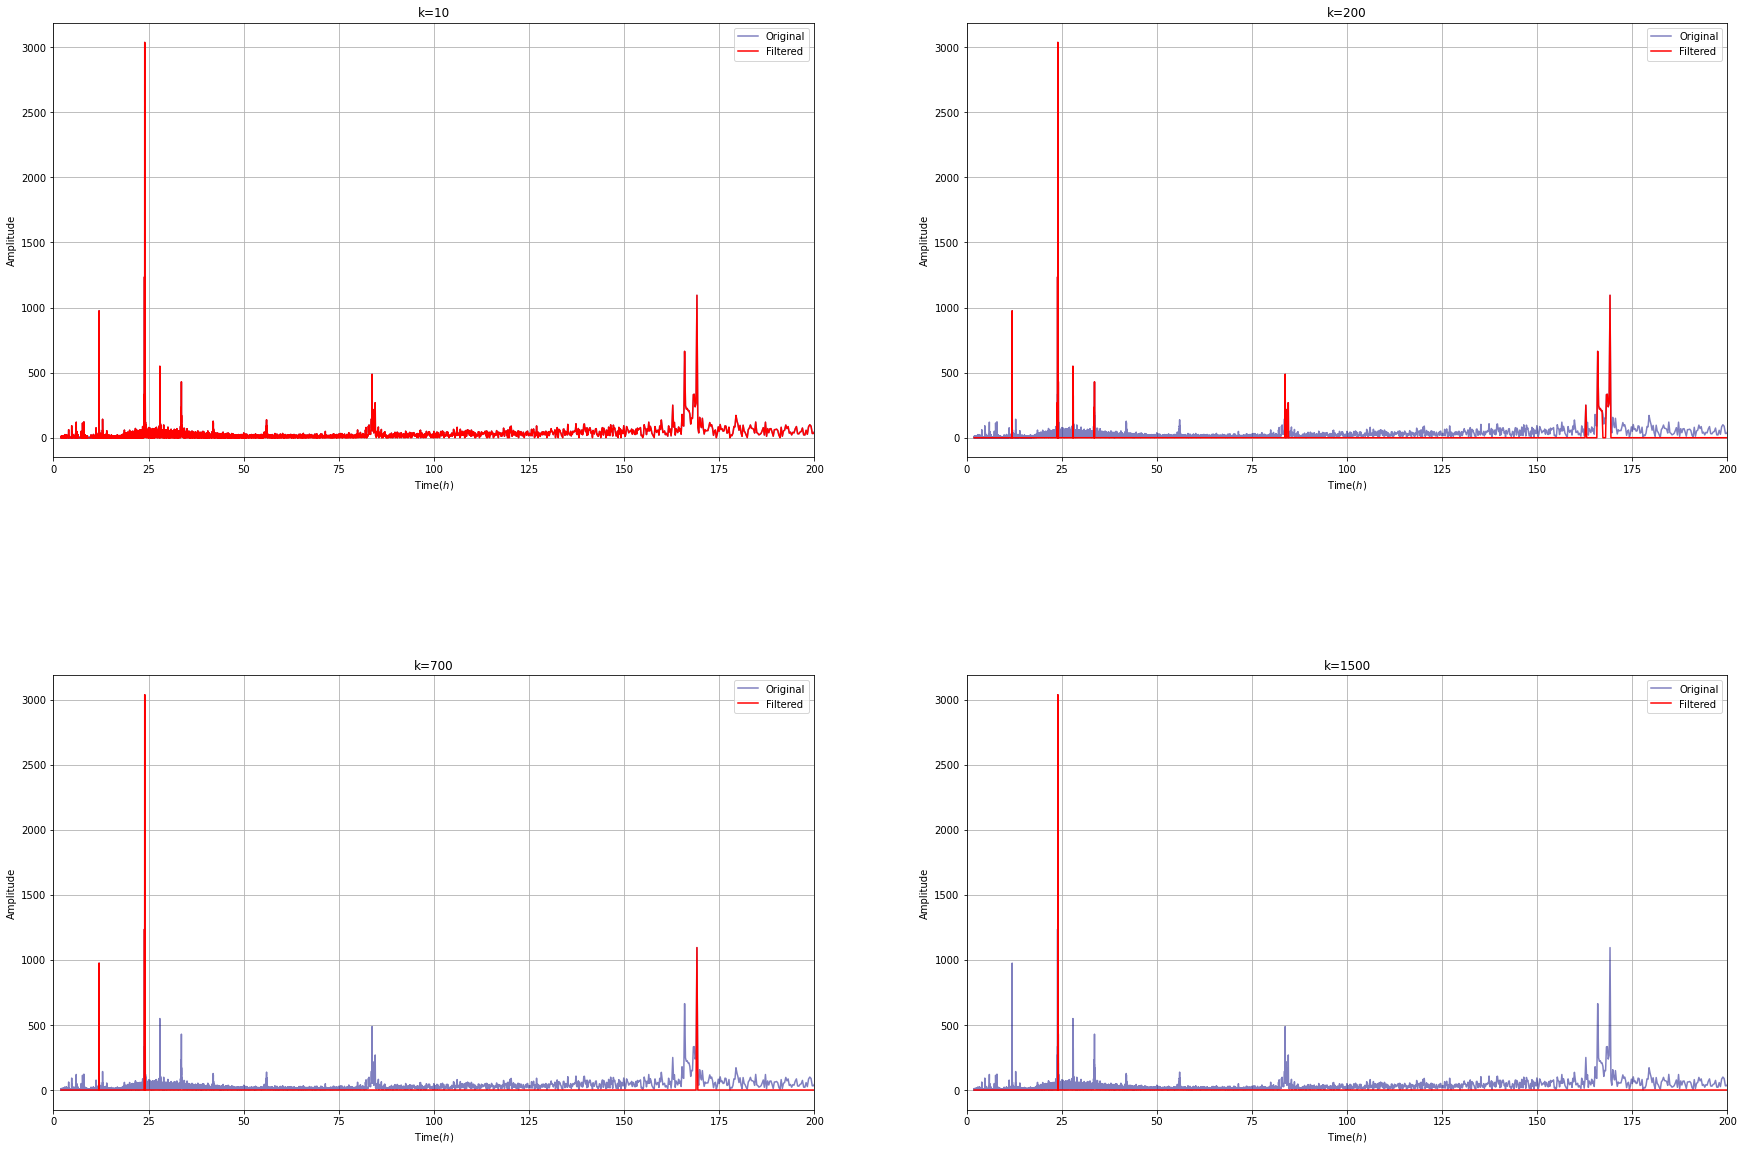

In [20]:
# Noise Filtering

#We need to be careful. If we set this threshold too high we don’t filter the noise only, 
# but we filter important features of the signal as well. If the threshold is too low, 
# we basically don’t filter anything and we still keep all the noise.

#Defining the filtering function
def fft_filter(fft: np.ndarray, th: float):
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing the plots at different thresholds values
#Defining the amplitude filtering function
def fft_filter_amp(fft: np.ndarray, th: float):
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(new_Xph)
    fft_tof_abs[fft_tof_abs<=th]=0
    return fft_tof_abs[0:int(len(fft_tof_abs)/2.)]

K_plot=[10,200,700,1500]
j=0
for k in K_plot:
    j=j+1
    plt.subplot(2,2,j)
    plt.title('k=%i'%(k))
    plt.xlim(0,200)
    plt.plot(new_Xph,2*FFT_abs[0:int(len(FFT)/2.)]/len(new_Xph),color='navy',alpha=0.5,label='Original')
    plt.grid(True)
    plt.plot(new_Xph,fft_filter_amp(fft = FFT, th = k),'red',label='Filtered')
    plt.xlabel('Time($h$)')
    plt.ylabel('Amplitude')
    plt.legend()
plt.subplots_adjust(hspace=0.5)


/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/bruno/miniconda3/envs/bru_ds/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


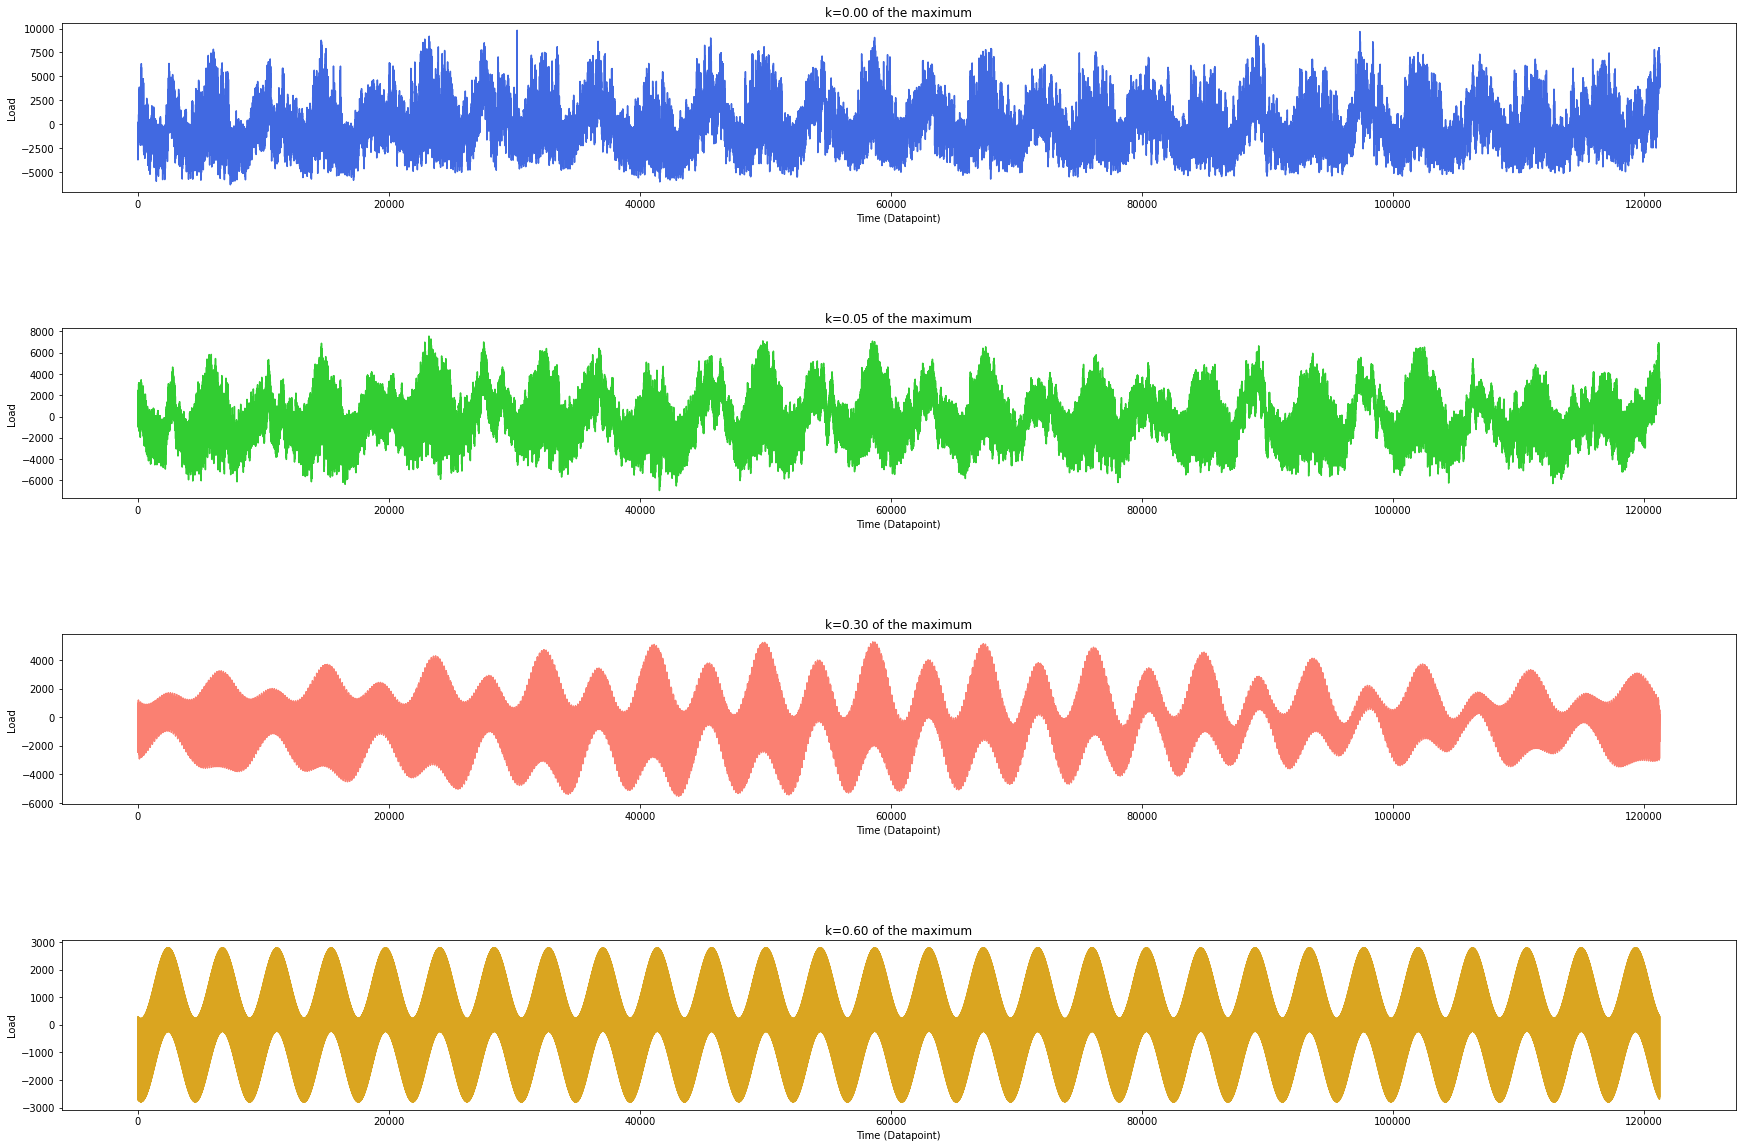

In [29]:
def fft_filter(fft: np.ndarray, fft_abs: np.ndarray, xph: np.ndarray,perc: float):
    th=perc*(2*fft_abs[0:int(len(fft)/2.)]/len(xph)).max()
    fft_tof=fft.copy()
    fft_tof_abs=np.abs(fft_tof)
    fft_tof_abs=2*fft_tof_abs/len(xph)
    fft_tof[fft_tof_abs<=th]=0
    return fft_tof

#Showing some plots at different threshold values
K_plot_values=[0.0,0.05,0.30,0.60]
j=0
colors = ['royalblue','limegreen','salmon','goldenrod']
for k in K_plot_values:
    j+=1
    plt.subplot(4,1,j)
    plt.plot(x,np.fft.ifft(fft_filter(fft=FFT, fft_abs=FFT_abs, xph=new_Xph, perc=k)),color=colors[j-1])
    plt.title('k=%.2f of the maximum' %(k))
    plt.xlabel('Time (Datapoint)')
    plt.ylabel('Load')
plt.subplots_adjust(hspace=0.8)

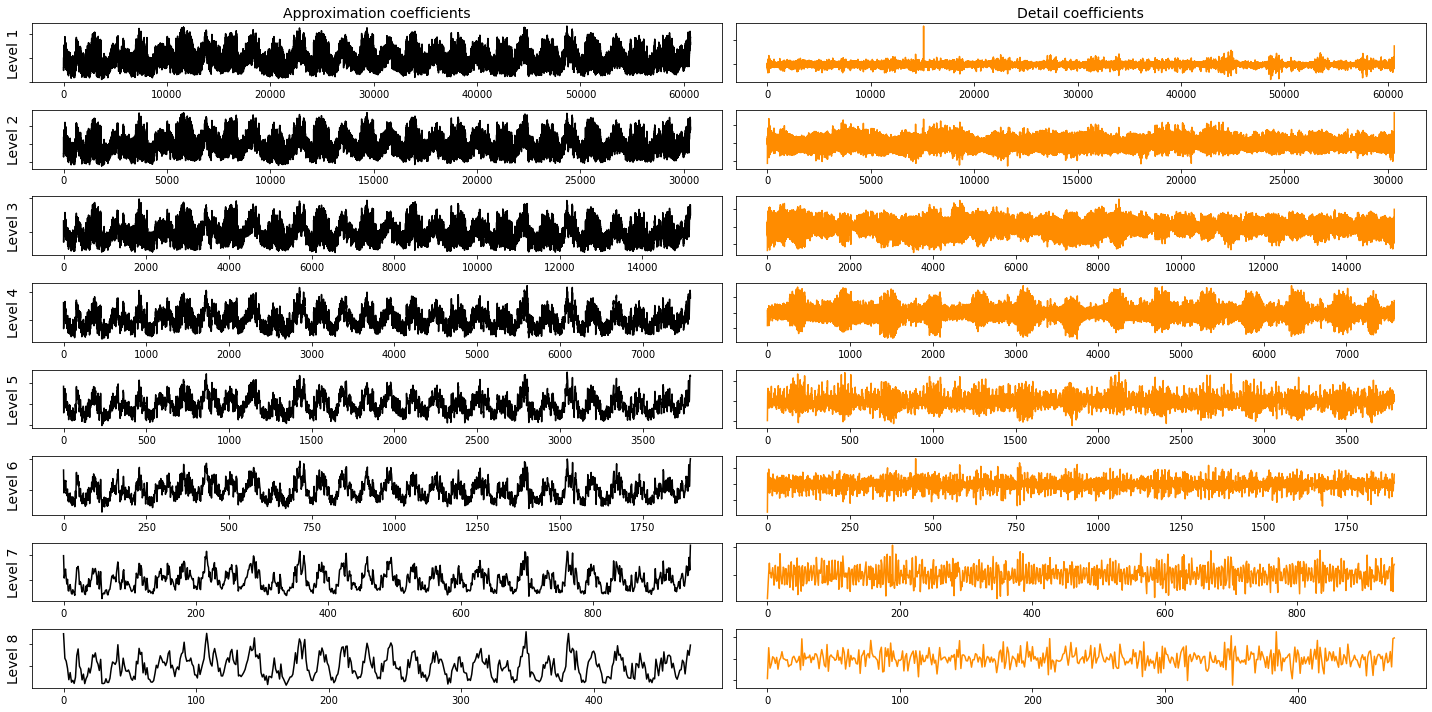

In [30]:
# Noise Filtering (Wavelet transform)

time=x.max()
sample_rate=1/900.
size= int(sample_rate*time)
t = np.linspace(0, time, num=size)
dataset = y_detrend
waveletname = 'sym2'
levels=8
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,10))
COEFF_D=[]
DATASET=[]
k=1
for ii in range(levels):
    (dataset, coeff_d) = pywt.dwt(dataset, waveletname,mode='per')
    axarr[ii, 0].plot(dataset, 'black')
    axarr[ii, 1].plot(coeff_d, 'darkorange')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
    #print(len(coeff_d))
    COEFF_D.append(np.repeat(coeff_d,2**k))
    DATASET.append(np.repeat(dataset,2**k))
    k=k+1
plt.tight_layout()
plt.show()

### Hilbert Transform

Sometimes you see your signal full of up and downs, but you don’t really want it. You just want to get the envelope. Mathematically, this operation is done using a convolution. In particular, the kernel is 1/(pi*t). There is nothing much to talk about in here at this stage, but we will see the power of this algorithm in the hands-on part in a minute!

In [32]:
new_data = pd.read_csv('./datasets/FE_hourly.csv')
new_data.head(4)

,Datetime,FE_MW
0,2011-12-31 01:00:00,6222.0
1,2011-12-31 02:00:00,5973.0
2,2011-12-31 03:00:00,5778.0
3,2011-12-31 04:00:00,5707.0


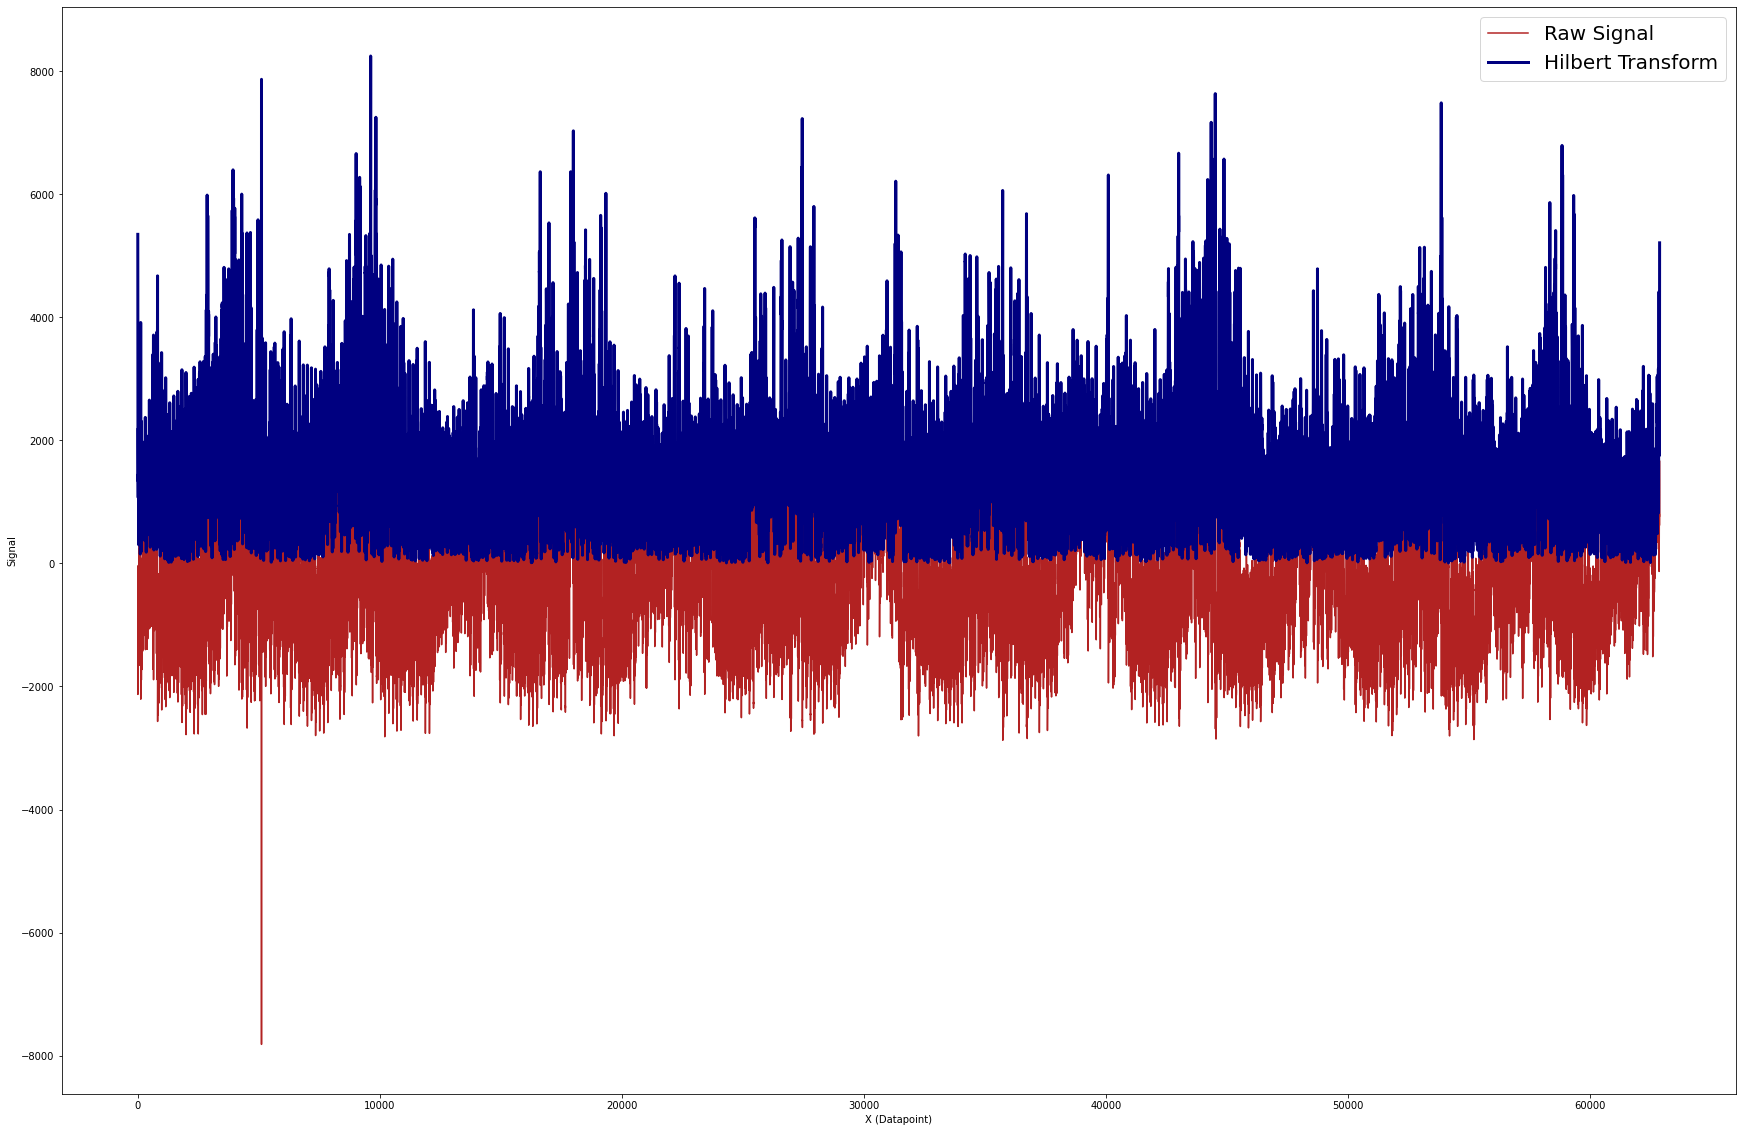

In [40]:
from scipy.signal import hilbert

new_signal = np.array(new_data['FE_MW'])
new_signal = signal.detrend(new_signal)
plt.plot(new_signal,color='firebrick',label='Raw Signal')
plt.xlabel('X (Datapoint)')
plt.ylabel('Signal')
plt.plot(np.abs(hilbert(new_signal)),color='navy',lw=3,label='Hilbert Transform')
plt.legend(fontsize=20)

## Statistical Tests

<img src="StatTest.png" alt="drawing" width="850"/>

### Student’s t-test


The t-test is a parametric test used to determine whether there is a significant difference between the means of two continuous samples.

**Two continious samples, same variance and no paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample are approximately normally distributed
 - Observations in each sample have the same variance

**Hypotheses**

 - H0: the means of the two samples are equal
 - H1: the means of the two samples are not equal

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Randomly generate data
x1 = np.random.normal(loc=0.25, scale=1, size=100)
x2 = np.random.normal(loc=0.00, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = ttest_ind(x1, x2)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the means of the samples are the same.')
else:
    print('Reject the null hypothesis and conclude the means of the samples are not the same.')

### Mann-Whitney U test


The Mann-Whitney U test is a non-parametric test to determine whether the distributions of two continuous samples are the same. The Mann-Whitney U test is the non-parametric version of the Student’s t-test for independent samples.

**Two continious samples, different variance and no paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample are continuous or ordinal and can be ranked
 - The distribution of each sample is approximately the same shape

**Hypotheses**

 - H0: the distributions of each sample are the same
 - H1: the distributions of each sample are not the same

In [ ]:
from scipy.stats import mannwhitneyu
import numpy as np

# Randomly generate the data
x1 = np.random.normal(loc=0.25, scale=1, size=100)
x2 = np.random.normal(loc=0.00, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = mannwhitneyu(x1, x2)

# Interpreatation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the distributions of the samples are the same.')
else:
    print('Reject the null hypothesis and conclude the distributions of the samples are not the same.')


### Paired Student’s t-test


The Paired Student’s t-test is a parametric test used to determine whether there is a significant difference between the means of two paired continuous samples.

**Two continious samples, same variance and paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample are approximately normally distributed
 - Observations in each sample have the same variance
 - Observations across each sample are paired

**Hypotheses**

 - H0: the means of the two samples are equal
 - H1: the means of the two samples are not equal

In [ ]:
from scipy.stats import ttest_rel
import numpy as np

# Randomly generate the data
x1 = np.random.normal(loc=0.00, scale=1, size=100)
x2 = x1 + np.random.normal(loc=0.25, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = ttest_rel(x1, x2)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the means of the paired samples are the same.')
else:
    print('Reject the null hypothesis and conclude the means of the paired samples are not the same.')


### Wilcoxon signed-rank test


The Wilcoxon signed-rank test is a non-parametric test to determine whether the distributions of two paired continuous samples are the same. The Wilcoxon test is the non-parametric version of the Paired Student’s t-test.

**Two continious samples, different variance and paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample can be ranked
 - Observations across each sample are paired

**Hypotheses**

 - H0: the distributions of the paired samples are the same
 - H1: the distributions of the paired samples are not the same

In [ ]:
# Example of the Paired Student's t-test
from scipy.stats import wilcoxon
import numpy as np

# Randomly generate the data
x1 = np.random.normal(loc=0.00, scale=1, size=100)
x2 = x1 + np.random.normal(loc=0.25, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = wilcoxon(x1, x2)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the distributions of the paired samples are the same.')
else:
    print('Reject the null hypothesis and conclude the distributions of the paired samples are not the same.')


### Analysis of Variance Test (ANOVA)


The one-way ANOVA test is a parametric test used to determine whether there is a significant difference between the means of two or more continuous samples.

**More than two continious samples, same variance and no paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample are approximately normally distributed
 - Observations in each sample have the same variance

**Hypotheses**

 - H0: the means of the two or more samples are equal
 - H1: one or more of the means of the samples are not equal

In [ ]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
import numpy as np

# Randomly generate the data
x1 = np.random.normal(loc=0.25, scale=1, size=100)
x2 = np.random.normal(loc=0.00, scale=1, size=100)
x3 = np.random.normal(loc=0.00, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = f_oneway(x1, x2, x3)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the means of the samples are the same.')
else:
    print('Reject the null hypothesis and conclude that one or more of the means of the samples are not the same.')


### Kruskal-Wallis H-test


The Kruskal-Wallis H-test is a non-parametric test to determine whether there is a significant difference between the medians of two or more continuous samples. It is the non-parametric equivalent of the one-way ANOVA test.

**More than two continious samples, same variance and no paired.**


**Assumptions**

 - Observations in each sample are independent
 - Observations in each sample have the same variance

**Hypotheses**

 - H0: the medians of the two or more samples are equal
 - H1: one or more of the medians of the samples are not equal

In [ ]:
from scipy.stats import kruskal
import numpy as np

# Randomly generate the data
x1 = np.random.normal(loc=0.25, scale=1, size=100)
x2 = np.random.normal(loc=0.00, scale=1, size=100)
x3 = np.random.normal(loc=0.00, scale=1, size=100)

# Calculate test statistic and p-value
stat, p = kruskal(x1, x2, x3)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the medians of the samples are the same.')
else:
    print('Reject the null hypothesis and conclude that one or more of the medians of the samples are not the same.')


### Chi-squared Test


The Chi-squared test tests the independence of two or more categorical variables in a contingency table.

**More than two categorical samples.**


**Assumptions**

 - Observations in each sample are independent
 - The observed and expected frequencies in each cell in the contingency table are at least 5


**Hypotheses**

 - H0: the variables are independent
 - H1: the variables are not independent

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Example contingency table
table = [[100, 80, 70],[150,  20,  80]]

# Calculate test statistic and p-value
stat, p, dof, expected = chi2_contingency(table)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the variables are independent.')
else:
    print('Reject the null hypothesis and conclude that the variables are dependent.')

### Fisher’s exact test


Like the Chi-squared test, Fisher’s exact test is used to test the independence of two categorical variables in a contingency table. Fisher’s exact test is used instead of a Chi-squared test when the sample sizes are small.


**Two categorical samples.**


**Assumptions**

 - Observations in each sample are independent


**Hypotheses**

 - H0: the variables are independent
 - H1: the variables are not independent

In [ ]:
from scipy.stats import fisher_exact

# Example contingency table
table = [[100, 80],[150,  20]]

# Calculate test statistic and p-value
stat, p = fisher_exact(table)

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the variables are independent.')
else:
    print('Reject the null hypothesis and conclude that the variables are dependent.')

### Poisson E-test


The Poisson exact test (E-test) tests whether there is a significant difference between two Poisson rates.


**Two continious samples, different variance and no paired.**


**Assumptions**

 - Observations in each sample are independent


**Hypotheses**

 - H0: the Poisson rates are the same
 - H1: the Poisson rates are not the same

In [ ]:
from statsmodels.stats.rates import test_poisson_2indep

# Example inputs taken from Gu, Ng, Tang, Schucany 2008: Testing the Ratio of Two Poisson Rates
count1 = 60
exposure1 = 51477.5
count2 = 30
exposure2 = 54308.7

# Calculate test statistic and p-value
stat, p = test_poisson_2indep(count1, exposure1, count2, exposure2, method='etest-wald')

# Interpreation
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Do not reject the null hypothesis and conclude the Poisson rates are the same.')
else:
    print('Reject the null hypothesis and conclude that the Poisson rates are not the same.')
